In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/ajith/Downloads/extracted_dataset/cleaned_titanic.csv")
print(df.info())  
print(df.head())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 17.3+ KB
None
   PassengerId  Survived  Pclass  \
0            2         1       1   
1            4         1       1   
2            7         0       1   
3           11         1       3   
4           12         1       1   

                      

In [9]:
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)


In [13]:
df[col] = df[col].fillna(df[col].mode()[0])


In [15]:
# Convert categorical columns using one-hot encoding
df = pd.get_dummies(df, columns=['Embarked', 'Sex'], drop_first=True)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


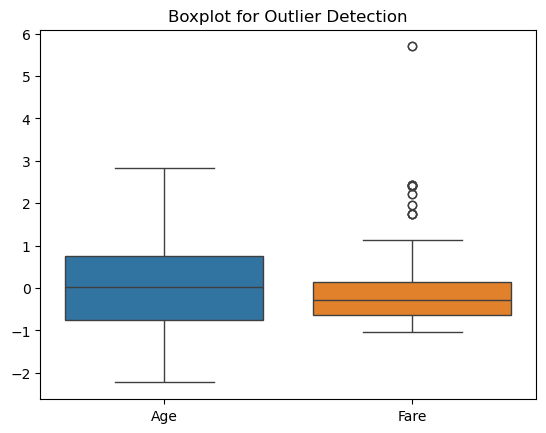

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing outliers using boxplots
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplot for Outlier Detection")
plt.show()


In [27]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers based on IQR
df_filtered = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [31]:
df_filtered.to_csv("C:/Users/ajith/Downloads/extracted_dataset/final_cleaned_titanic.csv", index=False)


In [33]:
import pandas as pd

df = pd.read_csv("C:/Users/ajith/Downloads/extracted_dataset/final_cleaned_titanic.csv")
print(df.info())  # Check data types & non-null values
print(df.head())  # Preview first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  142 non-null    int64  
 1   Survived     142 non-null    int64  
 2   Pclass       142 non-null    int64  
 3   Name         142 non-null    object 
 4   Age          142 non-null    float64
 5   SibSp        142 non-null    int64  
 6   Parch        142 non-null    int64  
 7   Ticket       142 non-null    object 
 8   Fare         142 non-null    float64
 9   Cabin        142 non-null    object 
 10  Embarked_Q   142 non-null    bool   
 11  Embarked_S   142 non-null    bool   
 12  Sex_male     142 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(3)
memory usage: 11.6+ KB
None
   PassengerId  Survived  Pclass  \
0            2         1       1   
1            4         1       1   
2            7         0       1   
3           12         1       1   
4       